# importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve,RocCurveDisplay,f1_score,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.drop(columns = ['id','Unnamed: 32'],inplace = True)


In [5]:
df['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [6]:
df['diagnosis'] = df['diagnosis'].map({"M":1,"B":0})

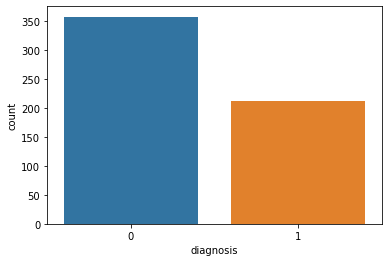

In [7]:
sns.countplot(x = 'diagnosis',data=df)
plt.show()

In [8]:
df.corr().style.background_gradient()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [9]:
table_corr = df.corr()

In [10]:
 table_corr_2 = pd.DataFrame(table_corr).query('diagnosis > 0.7')

In [11]:
table_corr_2.index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [12]:
df = df[table_corr_2.index]

In [13]:
X = df.drop('diagnosis',axis = 1)
y = df[['diagnosis']]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [14]:
X_train.shape, X_test.shape

((381, 8), (188, 8))

<Figure size 1440x1008 with 0 Axes>

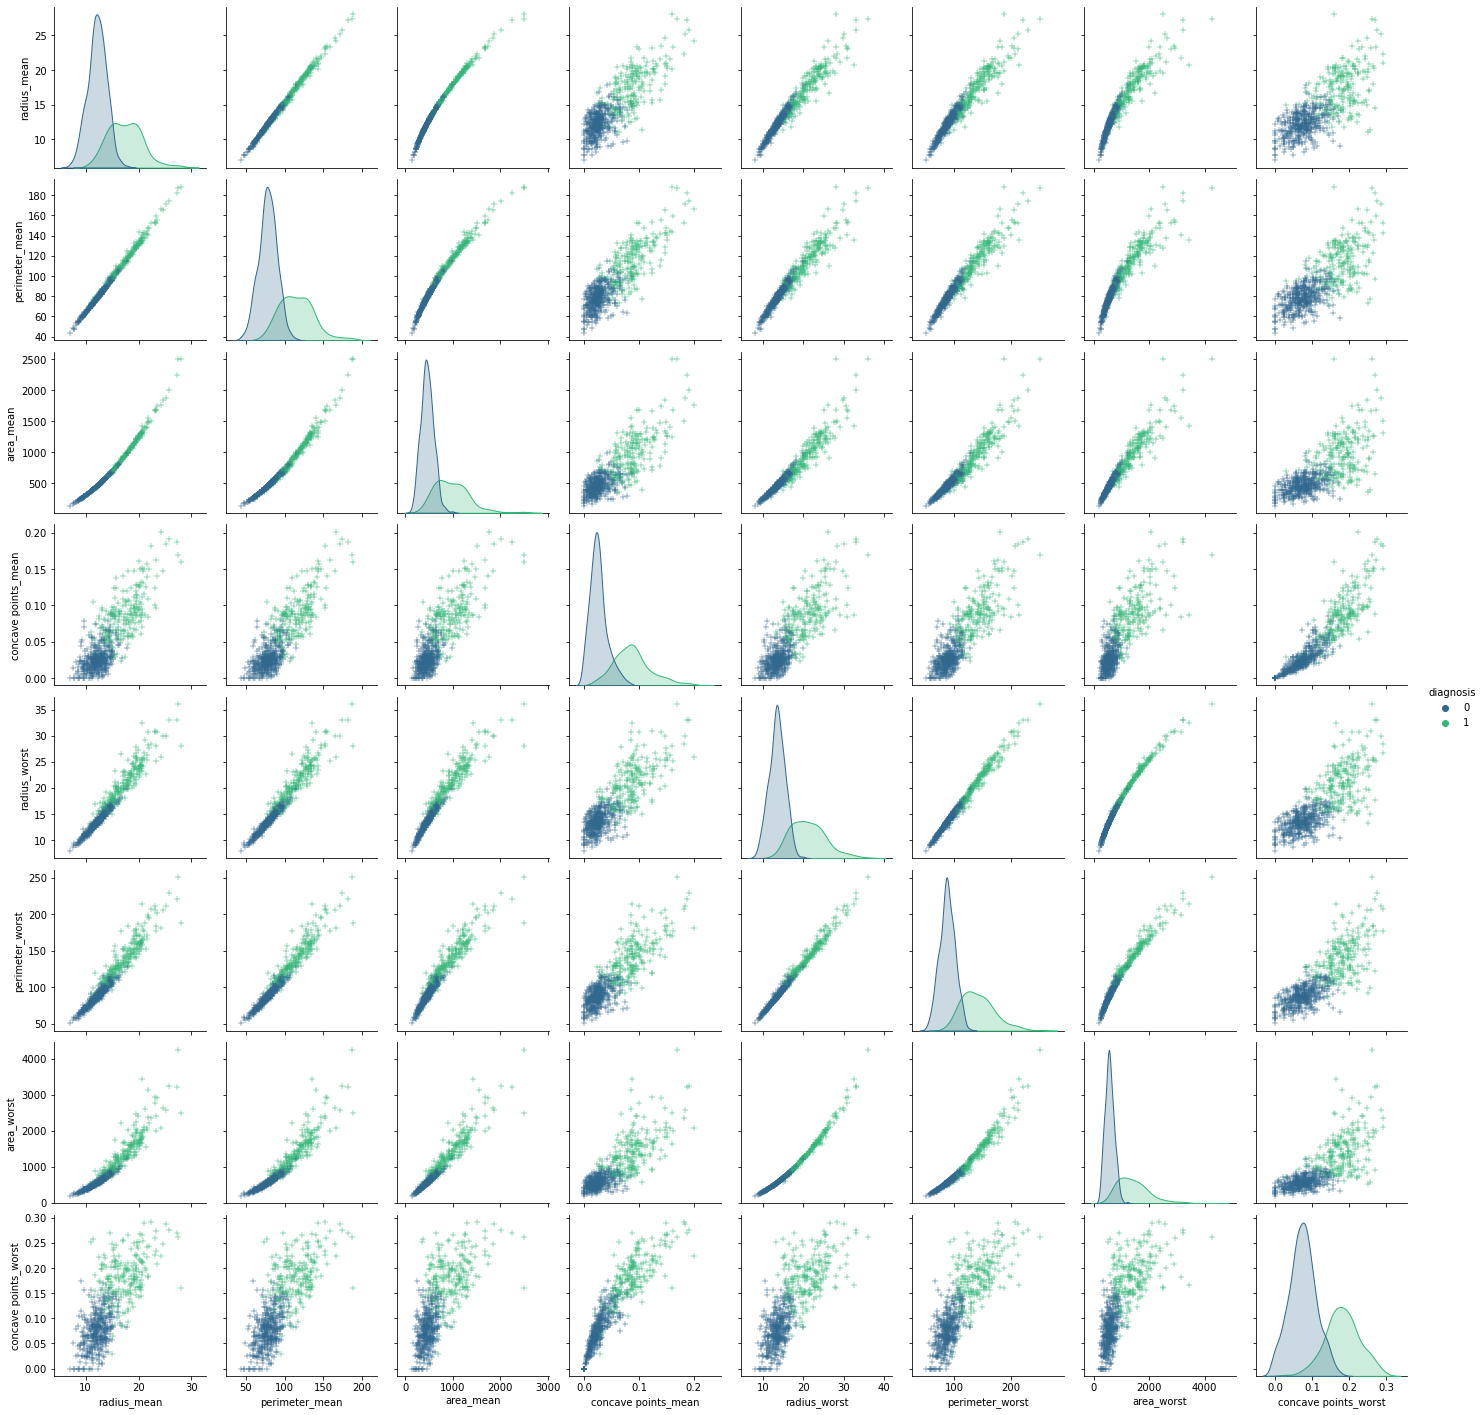

In [15]:
plt.figure(figsize=(20,14))
sns.pairplot(df,diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()

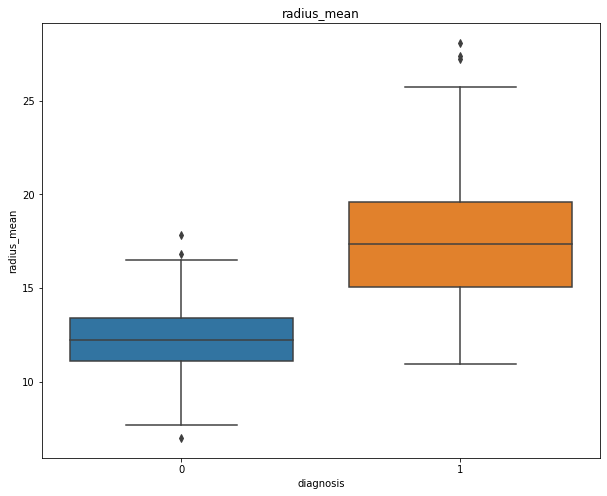

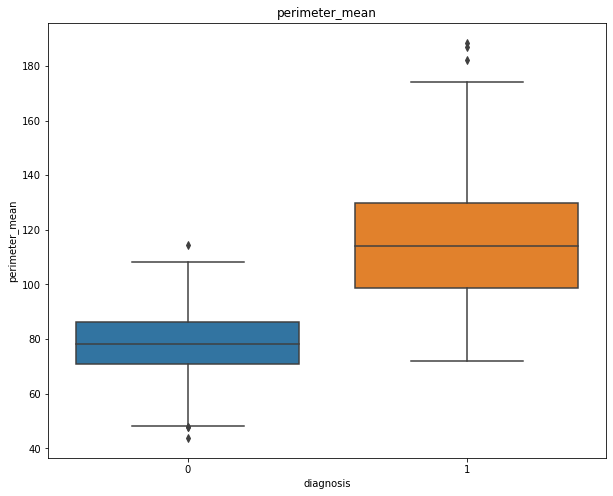

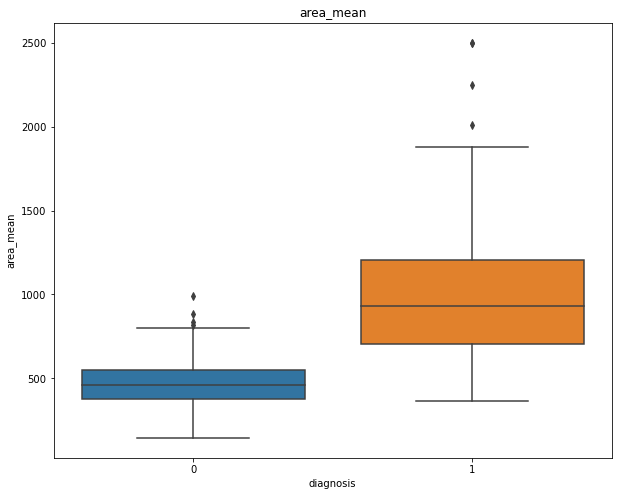

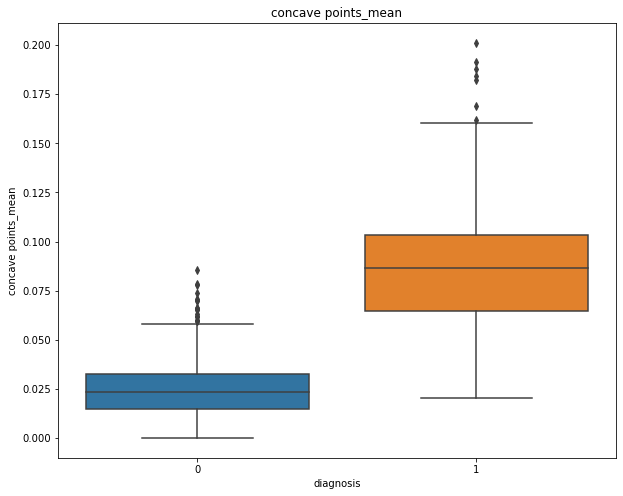

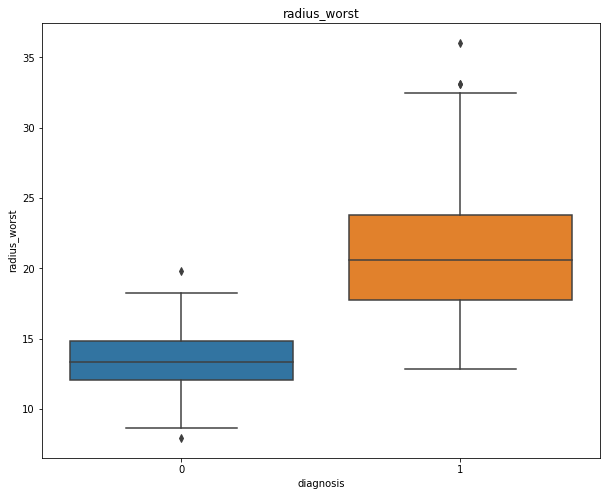

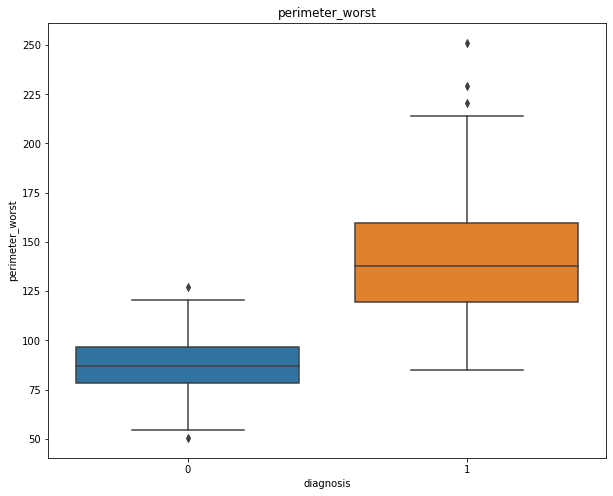

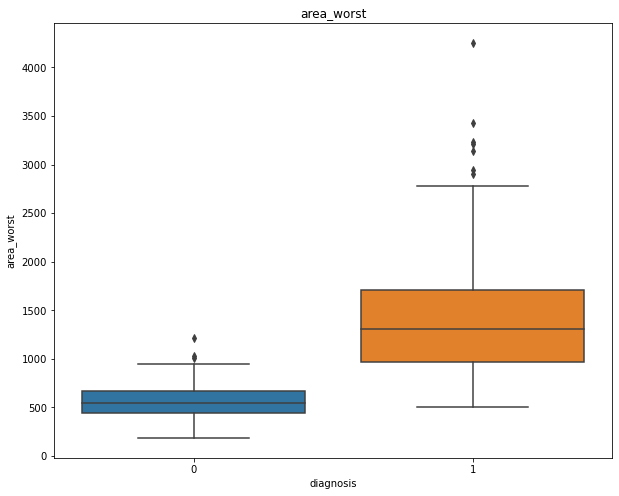

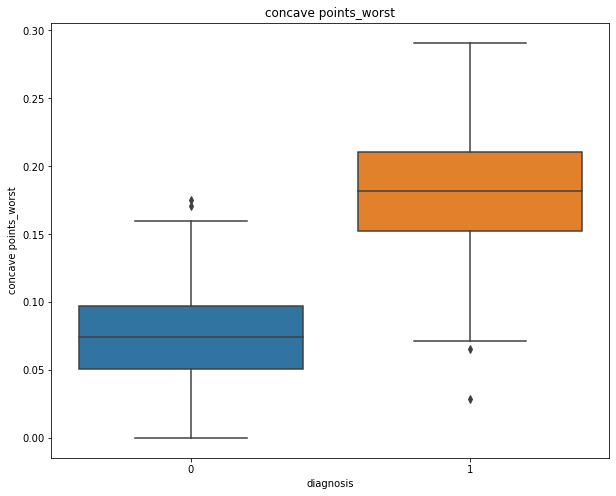

In [16]:
for col in df.columns:
    if col != 'diagnosis':
        plt.figure(figsize=(10,8))
        plt.title(col)
        sns.boxplot(x = 'diagnosis',y = col,data = df)
        plt.show()
    else: 
        pass

# Machine Learning Algorithms

In [17]:
clf_forest = RandomForestClassifier()
clf_log = LogisticRegression(solver = 'liblinear')
clf_xgb = XGBClassifier(objective ='binary:logistic')

clf = [clf_forest,clf_log,clf_xgb]

for i in clf:
    i.fit(X_train,y_train)

[19:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
y_forest = clf_forest.predict(X_test)
y_logreg = clf_log.predict(X_test)
y_xbg = clf_xgb.predict(X_test)

In [19]:
y_logreg

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [20]:
y_forest

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [21]:
y_xbg

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
m = ['random forest','logistic regression','xgboost']
f_forest = f1_score(y_test,y_forest)
f_logreg = f1_score(y_test,y_logreg)
f_xgb = f1_score(y_test,y_xbg)
f_score = pd.DataFrame({'f1 score' :[f_forest,f_logreg,f_xgb],'model': m})

In [23]:
model = keras.Sequential([layers.BatchNormalization()
                          ,layers.Dense(20, activation = 'relu', input_shape = [8]),
                          layers.BatchNormalization(),
                          layers.Dense(20, activation = 'relu'),
                          layers.BatchNormalization(),
                          layers.Dense(1, activation = 'sigmoid')])
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['binary_accuracy'])

In [24]:
history = model.fit(X_test,y_test,
                    epochs=30)

Epoch 1/30
6/6 [==============================] - 1s 1ms/step - loss: 0.4021 - binary_accuracy: 0.8670
Epoch 2/30
6/6 [==============================] - 0s 1ms/step - loss: 0.3335 - binary_accuracy: 0.9149
Epoch 3/30
6/6 [==============================] - 0s 1ms/step - loss: 0.3019 - binary_accuracy: 0.9043
Epoch 4/30
6/6 [==============================] - 0s 1ms/step - loss: 0.2629 - binary_accuracy: 0.9309
Epoch 5/30
6/6 [==============================] - 0s 1ms/step - loss: 0.2488 - binary_accuracy: 0.9362
Epoch 6/30
6/6 [==============================] - 0s 1ms/step - loss: 0.2347 - binary_accuracy: 0.9362
Epoch 7/30
6/6 [==============================] - 0s 1ms/step - loss: 0.2520 - binary_accuracy: 0.9255
Epoch 8/30
6/6 [==============================] - 0s 1ms/step - loss: 0.2188 - binary_accuracy: 0.9202
Epoch 9/30
6/6 [==============================] - 0s 1ms/step - loss: 0.1853 - binary_accuracy: 0.9415
Epoch 10/30
6/6 [==============================] - 0s 1000us/step - loss:

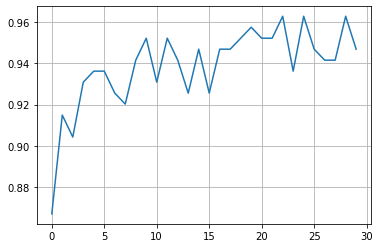

In [25]:
history_score = pd.DataFrame(history.history)
plt.plot(history_score[['binary_accuracy']])
plt.grid()
plt.show()

In [26]:
predict = model.predict(X_test)

In [27]:
predict

array([[0.15278342],
       [0.17365071],
       [0.117156  ],
       [0.09108299],
       [0.3067173 ],
       [0.1136587 ],
       [0.46302086],
       [0.3016283 ],
       [0.7808315 ],
       [0.9907512 ],
       [0.24404436],
       [0.2575179 ],
       [0.59051824],
       [0.11794609],
       [0.1761238 ],
       [0.11936596],
       [0.21017301],
       [0.35389113],
       [0.6474148 ],
       [0.29110038],
       [0.22021496],
       [0.9148477 ],
       [0.09176457],
       [0.37761307],
       [0.9532373 ],
       [0.9795101 ],
       [0.13444483],
       [0.16971982],
       [0.684859  ],
       [0.18662676],
       [0.1059989 ],
       [0.3851818 ],
       [0.9159613 ],
       [0.78496075],
       [0.8566099 ],
       [0.11485532],
       [0.11857751],
       [0.6557182 ],
       [0.2639988 ],
       [0.1342082 ],
       [0.14978856],
       [0.13382566],
       [0.13621327],
       [0.9966464 ],
       [0.08710319],
       [0.8186362 ],
       [0.9701653 ],
       [0.887

In [28]:
f_score.loc[len(f_score)] = [f1_score(y_test,np.rint(predict)),'Neural network']

In [29]:
f_score

,f1 score,model
0,0.913043,random forest
1,0.928571,logistic regression
2,0.929577,xgboost
3,0.842767,Neural network


In [30]:
cm_forest = confusion_matrix(y_test,y_forest,labels = clf_forest.classes_)
cm_logreg = confusion_matrix(y_test,y_logreg,labels = clf_log.classes_)
cm_xgb = confusion_matrix(y_test,y_xbg,labels = clf_xgb.classes_)

disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest,display_labels=clf_forest.classes_)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,display_labels=clf_log.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=clf_xgb.classes_)

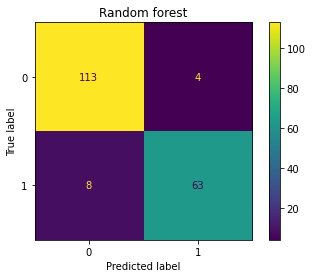

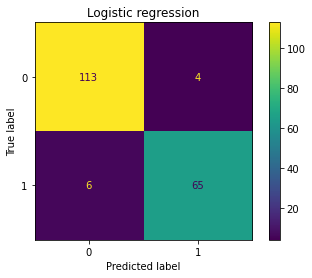

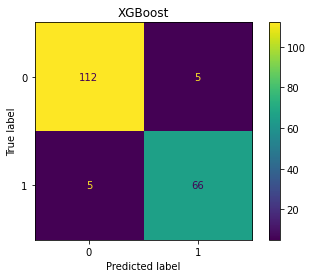

In [31]:
labels = ['Random forest','Logistic regression','XGBoost']
disp = [disp_forest,disp_logreg,disp_xgb]
for i,l in zip(disp,labels):
    i.plot()
    plt.title(l)
    plt.show()

In [32]:
cm_nn = confusion_matrix(y_test, np.rint(predict))

disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)

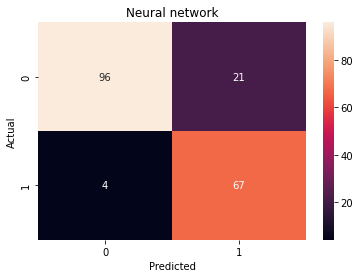

In [33]:
sns.heatmap(confusion_matrix(y_test.to_numpy(), np.rint(predict)),annot=True)
plt.title('Neural network')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
fpr_f,tpr_f, _ = roc_curve(y_test, y_forest)
fpr_l,tpr_l, _ = roc_curve(y_test, y_logreg)
fpr_x,tpr_x, _ = roc_curve(y_test, y_xbg)
auc_f = auc(fpr_f,tpr_f)
auc_l = auc(fpr_l,tpr_l)
auc_x = auc(fpr_x,tpr_x)

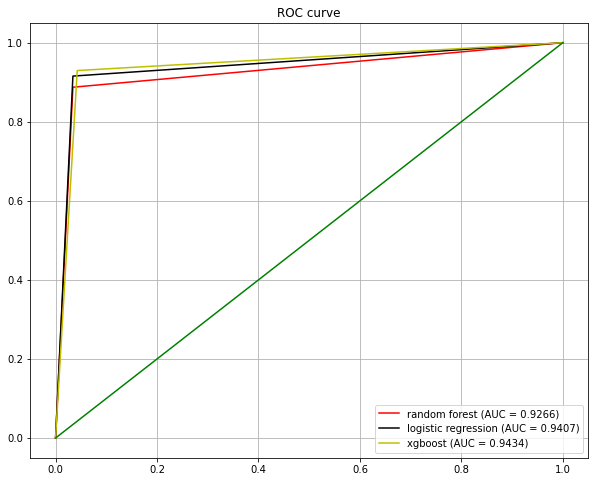

In [35]:
plt.figure(figsize=(10,8))
plt.title('ROC curve')
l1, = plt.plot(fpr_f,tpr_f,color = 'r',label='random forest (AUC = %0.4f)'%auc_f)
l2, = plt.plot(fpr_l,tpr_l,color = 'k',label='logistic regression (AUC = %0.4f)'%auc_l)
l3, = plt.plot(fpr_x,tpr_x,color = 'y',label='xgboost (AUC = %0.4f)'%auc_x)
plt.plot([0, 1], [0, 1],color = 'g')
plt.legend(handles = [l1,l2,l3])
plt.grid()
plt.show()

In [36]:
fpr_nn,tpr_nn, _ = roc_curve(y_test, predict)
auc_nn = auc(fpr_nn,tpr_nn)

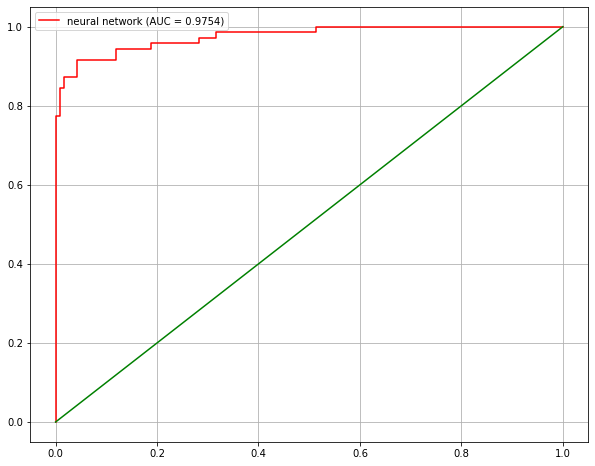

In [37]:
plt.figure(figsize=(10,8))
l4, = plt.plot(fpr_nn,tpr_nn,color = 'r',label = 'neural network (AUC = %0.4f)'%auc_nn)
plt.plot([0, 1], [0, 1],color = 'g')
plt.legend(handles = [l4])
plt.grid()
plt.show()